# Cars 4 You: Expediting Car Evaluations with Machine Learning

## Problem Statement

**Cars 4 You** is an online car resale company that buys vehicles from different brands through its platform.  
Users submit details about their cars, which are then sent for mechanic evaluation before resale.

Due to rapid growth, the company faces **delays in car inspections**, leading to loss of potential customers.  
To solve this, the company wants a **predictive model** capable of estimating the **price of a car based on user-provided inputs**, without needing a physical evaluation.

## Project Objectives

The overall project is structured into three main goals (for the final submission), but the **first deliverable** focuses on the **initial stages** of this workflow.

### 1. Regression Benchmarking
Develop a regression model that predicts car prices (`price`) using the 2020 Cars 4 You dataset.  
Implement a consistent **model assessment strategy** to compare models and select the most generalizable one.

### 2. Model Optimization
Later in the project, explore model optimization through:
- Hyperparameter tuning  
- Feature engineering and preprocessing adjustments  

Compare and discuss the performance improvements.

### 3. Additional Insights
Open-ended exploration for the final project phase (e.g., feature importance, ablation study, specialized models, deep learning).



## Dataset Description

You have access to two datasets:

- **Training Set:** Cars from the 2020 Cars 4 You database, including prices (`price`).
- **Test Set:** Same descriptive features but without prices — used for Kaggle submission.

### Variables

| Attribute | Description |
|------------|-------------|
| **carID** | Unique identifier for each car |
| **Brand** | Car brand (e.g., Ford, Toyota) |
| **model** | Car model |
| **year** | Year of registration |
| **mileage** | Distance travelled (in miles) |
| **tax** | Road tax applicable in 2020 (in £) |
| **fuelType** | Fuel type (Diesel, Petrol, Hybrid, Electric) |
| **mpg** | Miles per gallon |
| **engineSize** | Engine size in liters |
| **paintQuality%** | Mechanic’s paint and hull assessment |
| **previousOwners** | Number of previous owners |
| **hasDamage** | Boolean (True/False) — damaged or not |
| **price** | Target variable — purchase price (£) |



## FIRST DELIVERABLE — Task Overview

This initial assignment is a **preparatory milestone** for your final project.  
You will **explore, prepare, and model** the dataset to demonstrate an understanding of the full ML pipeline.

Your submission must include:

1. A **Jupyter Notebook** (or a ZIP of notebooks) with code and explanatory Markdown cells.
2. A **2-page PDF** describing your pipeline’s structure and rationale.

### Naming Convention
Homework_Group36 



## DELIVERABLE TASKS & POINT DISTRIBUTION

### 1. Data Import & Exploration — *3 points*
- Load and inspect the dataset contents.  
- Generate **descriptive statistics**.  
- Detect and describe **inconsistencies or anomalies**.  
- Perform **visual exploration** (univariate & multivariate).  
- Extract **insights** and explain your findings.


### 2. Data Cleaning & Preprocessing — *5 points*
- Identify and **handle missing values** appropriately.  
- Detect and manage **outliers**, justifying your choices.  
- Encode **categorical variables**.  
- Evaluate existing features and, if relevant, **create new ones** with explanations.  
- Apply **data scaling/normalization**, explaining why your approach fits the problem.


### 3. Feature Selection — *3 points*
- Define a **clear feature selection strategy**.  
- Use **course-approved methods** (e.g., correlation, recursive elimination, model-based).  
- Present and justify your **final feature set**.


### 4. Model Building & Performance Assessment — *4 points*
- Identify the **problem type** (regression).  
- Choose relevant **algorithms** (linear models, tree-based, etc.).  
- Define one **model assessment strategy** (e.g., holdout, k-fold cross-validation).  
- Justify the **evaluation metrics** (e.g., RMSE, MAE, R²).  
- Train **at least one model** and generate **predictions for the test set**.

💡 **Bonus:** +1 point if your team ranks in the **Top 5 on Kaggle**.



### 5. Pipeline Structure & Documentation (PDF) — *5 points*
- Provide a **schematic of your full pipeline**:
  - Data cleaning  
  - Feature preprocessing  
  - Feature selection  
  - Model training and evaluation  
- Include concise explanations of:
  - What is done  
  - To which variables  
  - Why each step is taken
- Maintain **clarity, structure, and readability** throughout.


### Total Scoring
| Component | Points |
|------------|---------|
| Data Exploration | 3 |
| Preprocessing | 5 |
| Feature Selection | 3 |
| Model Building | 4 |
| Pipeline Documentation | 5 |
| **Total** | **20 points** |
| **Bonus (Top 5 Kaggle)** | **+1** |
| **Final Grade = min(20, your points)** |  |


## Completion Checklist

| Task | Done? |
|------|-------|
| Dataset imported and explored | ☐ |
| Missing values handled | ☐ |
| Outliers addressed | ☐ |
| Categorical variables encoded | ☐ |
| Features scaled and/or engineered | ☐ |
| Feature selection strategy implemented | ☐ |
| Regression model trained | ☐ |
| Performance metrics explained | ☐ |
| Predictions generated for test set | ☐ |
| Pipeline described in PDF | ☐ |
| Kaggle submission tested | ☐ |
| Notebook clean, commented, and executable | ☐ |


# 1. Importing libraries & Data

In [1]:
# general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target 
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)

#### Data Loading

In [2]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


#### Verify that carID can be used as index

In [3]:
train_raw['carID'].is_unique

True

In [4]:
train_raw['carID'].isna().any()

False

#### Set carID as index

In [5]:
# setting carID as index
train_raw.set_index('carID', inplace = True)

# sorting by index
train_raw.sort_index(inplace =True)

# displaying the first three rows
train_raw.head(3)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,2016.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,2017.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,2016.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0


# 2. Exploratory Data Analysis

In [6]:
train = train_raw.copy()

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engineSize,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


In [8]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [9]:
# let's check a sample of the data
train.sample(10)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0


## 2.1 Inconsistencies

**Brand**

Typing errors

In [10]:
# display all unique values 
train['Brand'].unique()

array(['Aud', 'Audi', nan, 'audi', 'udi', 'AUDI', 'UDI', 'ud', 'aud',
       'AUD', 'BMW', 'MW', 'bmw', 'BM', 'mw', 'Ford', 'ford', 'for',
       'FORD', 'For', 'ord', 'ORD', 'FOR', 'or', 'Hyundai', 'Hyunda',
       'yundai', 'hyundai', 'HYUNDAI', 'hyunda', 'HYUNDA', 'yunda',
       'Mercedes', 'mercedes', 'MERCEDES', 'ercedes', 'Mercede', 'ercede',
       'ERCEDES', 'MERCEDE', 'mercede', 'Skoda', 'koda', 'SKODA', 'Skod',
       'SKOD', 'skoda', 'kod', 'skod', 'KODA', 'Toyota', 'toyota',
       'TOYOTA', 'Toyot', 'oyota', 'TOYOT', 'OYOTA', 'toyot', 'Opel',
       'pel', 'opel', 'Ope', 'OPEL', 'OPE', 'PEL', 'ope', 'pe', 'VW', 'W',
       'v', 'V', 'vw', 'w'], dtype=object)

In [11]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

**model**

Typing errors

In [12]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [13]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [14]:
train['model'].unique()

array(['a3', 'a7', 'a4', 'q3', 'a6', 'a5', 'tt', 'q7', 'a1', 'q2', 'rs5',
       'a8', 'q5', 'a', 's4', nan, 'q', 'q8', 'rs3', 'rs6', 'rs4', 'rs',
       's3', 'r8', 's8', 'sq5', 'a2', 'sq7', 's5', 't', '1 series',
       '3 series', '2 series', 'x1', 'x3', 'x5', '5 series', 'z4',
       '4 series', 'x6', 'x2', '2 serie', '5 serie', '6 series', 'x4',
       '7 series', '3 serie', 'm3', 'm4', 'i8', 'x', 'x7', 'm2', 'm',
       'm5', '4 serie', '1 serie', 'z3', 'i3', 'z', '8 series', 'm6',
       '7 serie', '8 serie', 'i', '6 serie', 'focus', 'focu', 'fiesta',
       'kuga', 'puma', 'ecosport', 'ka+', 'edge', 's-max', 'fusion',
       'fiest', 'c-max', 'ka', 'grand c-max', 'mondeo', 's-ma', 'monde',
       'tourneo connect', 'b-max', 'galaxy', 'mustang',
       'grand tourneo connect', 'tourneo custom', 'c-ma', 'kug', 'b-ma',
       'ecospor', 'grand c-ma', 'streetka', 'k', 'ranger', 'escort',
       'galax', 'edg', 'grand tourneo connec', 'tourneo custo', 'i30',
       'ix20', 'i10', 'i

**transmission**

Typing errors

In [15]:
train['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'anual', 'manual', 'AUTOMATIC',
       'Manua', 'emi-Auto', nan, 'unknown', 'SEMI-AUTO', 'Semi-Aut',
       'nknown', 'Manual ', 'MANUAL', 'automatic', ' Manual ',
       'semi-auto', 'emi-auto', 'Automati', 'utomatic', 'anua', 'ANUAL',
       'unknow', 'SEMI-AUT', 'UTOMATIC', 'emi-Aut', 'MANUA', 'semi-aut',
       'EMI-AUTO', 'utomati', 'UNKNOWN', ' Manual', ' MANUAL ', 'manua',
       'AUTOMATI', ' manual ', 'manual ', 'Other', 'automati', 'nknow'],
      dtype=object)

In [16]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

**fuelType**

Typing errors

In [17]:
train['fuelType'].unique()

array(['Diesel', 'diesel', 'Petrol', 'Petro', 'etrol', 'petrol', 'iesel',
       'PETROL', nan, 'DIESEL', 'Diese', 'Hybrid', 'etro', 'ETROL',
       'iese', 'PETRO', 'petro', 'ybrid', 'diese', 'IESEL', 'Other',
       'HYBRID', 'hybrid', 'Hybri', 'DIESE', 'Othe', 'Electric', 'ETRO',
       'IESE', 'ybri', 'YBRID', 'OTHER', 'ther', 'HYBRI', 'other'],
      dtype=object)

In [18]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

**year**

Non int values

In [19]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2017.         2019.         2015.         2020.
 2018.         2014.         2013.         2011.         2012.
 2023.60527574 2008.         2005.                   nan 2010.37154646
 2002.         2007.         2006.         2010.         2004.
 2003.         2009.         1998.         2024.12175905 2009.81675711
 2001.         1997.         1999.         2023.1169636  2010.67696784
 2000.         1996.         2022.87800554 2011.11118842 2023.97731126
 2011.21085349 1970.         2022.69668507 2012.69574039 2023.36707842
 2010.26863473 2010.56500919 2023.26798867 2023.38982198 2010.7464032 ]

The number of rows with non-integer year values are: 723


In [20]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
34011,hyundai,tucson,2011.111188,13750,manual,22445.0,iesel,30.0,61.7,1.7,75.0,4.0,0.0
30502,ford,kuga,2010.676968,19500,manual,24509.0,diesel,150.0,54.3,2.0,55.0,2.0,0.0
10511,bmw,5 series,2009.816757,11450,manual,60529.0,diesel,30.0,65.7,2.0,81.0,3.0,0.0
40542,mercedes,c class,2011.210853,26550,automatic,4001.0,diesel,NaN,NaN,2.0,61.0,2.0,0.0
54299,toyota,hilux,2023.367078,24995,automatic,NaN,diese,260.0,36.2,2.4,88.0,0.0,0.0


**mileage**

Negative values

In [21]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [22]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
25987,ford,focus,2017.0,17500,manual,-42650.453719,petrol,145.0,41.50000,2.0,57.0,1.0,0.0
39727,mercedes,c class,2017.0,16911,semi-auto,-50755.210230,diesel,150.0,65.70000,1.6,94.0,2.0,0.0
32108,hyundai,tucson,2016.0,12990,manual,-36635.042697,diesel,30.0,61.70000,1.7,61.0,4.0,0.0
24959,ford,fiesta,2019.0,14100,manual,-42650.453719,petrol,145.0,27.70949,1.0,95.0,3.0,0.0
46275,mercedes,c class,2019.0,25080,semi-auto,-50755.210230,petrol,145.0,42.20000,1.5,32.0,1.0,0.0


**tax**

Negative values

In [23]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[  0.         150.         125.         145.                  nan
  30.          20.         235.         555.         200.
 -60.6840948  160.         205.         240.         260.
 265.         330.         327.91577835 300.         295.
 565.         325.         195.         135.         165.
 305.         535.         140.         570.         280.
 315.         540.         220.         580.         190.
 155.         230.         -43.24208237 316.48718937 270.
 120.         255.         250.         110.         185.
 245.         -45.78061049 299.47350391 290.         115.
 210.         294.84340933 -31.91494466 -56.19320154 326.02823317
 520.          10.         277.38425448 -18.33074314 -91.12163048
 316.29630636 290.48678508 -20.24107949 130.         -49.15354066
 303.14889146]

The number of rows with negative tax values is: 378


In [24]:
# lets see the rows where tax is negative
train.loc[train['mileage'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
52762,toyota,c-hr,2017.0,19300,automatic,-39765.602338,hybrid,0.0,74.3,1.8,60.0,4.0,0.0
56046,opel,adam,2019.0,10495,manual,-42707.564215,petrol,150.0,44.8,1.2,53.0,2.0,0.0
2675,audi,tt,2019.0,30766,semi-auto,-52618.457894,petrol,145.0,37.2,NaN,87.0,4.0,0.0
13982,bmw,5 series,2017.0,21390,automatic,-58540.574478,diesel,150.0,65.7,2.0,40.0,4.0,0.0
39125,mercedes,e class,2019.0,37899,semi-auto,-50755.210230,diesel,145.0,48.7,3.0,41.0,3.0,0.0


In [25]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
11523,bmw,4 series,2019.0,30450,unknown,NaN,petrol,316.487189,39.2,3.0,79.0,3.0,0.0
64172,opel,astra,2017.0,10491,manual,16515.0,diese,290.486785,72.4,1.6,65.0,3.0,0.0
24041,ford,focus,2015.0,7495,manual,56329.0,diesel,299.473504,74.3,1.5,NaN,2.0,0.0
60524,opel,crossland x,2018.0,10698,manual,6412.0,petrol,290.486785,58.9,1.2,91.0,3.0,0.0
26395,ford,grand c-max,2016.0,13499,automatic,19525.0,diesel,299.473504,56.5,2.0,49.0,4.0,0.0


**mpg**

Negative values

In [26]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 83.1         55.4         53.3         51.4         47.9
  57.6         58.9         46.3         49.6         33.2
  40.9         32.1         31.4         47.1         54.3
  80.7         64.2         39.8         68.9         74.3
  44.1         38.7         38.2         67.3         44.8
  26.4         39.2         42.8         42.2         48.7
  60.1         56.5         32.8         50.4         52.3
  41.5         43.5         32.5         61.4         40.4
  65.7                 nan  34.9         37.2         70.6
  45.6         35.8          9.82146197  34.          34.5
  22.4         76.3         62.8         33.6         30.7
  89.77369267  36.7         31.7         29.4         30.1
  36.2         37.7         29.7         29.1         72.4
  35.3        141.3        117.7         31.          34.4
  57.7        156.9         21.1         28.8        176.6
  42.1         33.3         20.3        188.3         76.4
  19.6         21.9         24.1         21.6         22

In [27]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
11143,bmw,z4,2013.0,13640,semi-auto,26356.0,petrol,200.0,-43.421768,2.0,44.0,4.0,0.0
13698,bmw,3 series,2016.0,13750,manual,59222.0,diesel,125.0,-43.421768,2.0,74.0,1.0,0.0
11181,bmw,1 series,2019.0,19298,semi-auto,10040.0,diesel,145.0,-43.421768,2.0,70.0,3.0,0.0
14603,bmw,2 series,2015.0,17541,semi-auto,26035.0,petrol,165.0,-43.421768,2.0,75.0,3.0,0.0
14127,bmw,2 series,2020.0,32450,semi-auto,1118.0,diesel,145.0,-43.421768,2.0,37.0,1.0,0.0


**engineSize**	

Negative values

In [28]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 1.6         3.          1.4         2.          1.8         1.
  1.5                nan  4.2         1.2         0.15452932  0.
  2.5         4.          3.73923548  2.9         2.7         5.2
  1.9         4.1         3.2         0.31340658  3.82275785  2.2
  4.4         6.6         0.6         3.5         5.          1.1
 -0.1034928   2.3         2.63120047  1.3         1.7         2.6631132
  0.37112737  2.4         2.1         3.72371217  0.30707394  5.5
  5.4         6.2         3.6         4.7         2.6         6.
  4.3         0.19146242  2.61964142  0.16286595  2.8         2.78177621
  4.5         0.7395339   2.06411863  0.18642488  2.98579344]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [29]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
17489,ford,ecosport,2015.0,9000,automatic,33161.0,petrol,160.0,44.8,-0.103493,90.0,4.0,0.0
20733,ford,focus,2018.0,11991,manual,24174.0,diesel,145.0,74.3,-0.103493,66.0,4.0,0.0
24009,ford,kuga,2017.0,17474,manual,NaN,diesel,145.0,54.3,-0.103493,33.0,1.0,0.0
23997,ford,focus,2017.0,11498,manual,15378.0,petrol,20.0,61.4,-0.103493,75.0,1.0,0.0
22282,ford,focus,2016.0,7842,manual,71364.0,diesel,NaN,NaN,-0.103493,49.0,4.0,0.0


**paintQuality%**

% above 100 & non int values 

In [30]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 75.          31.          65.          55.          62.
  97.          77.          49.          79.          96.
  36.         125.30194543  80.          57.          83.
  47.          66.          30.          74.          85.
  99.          73.          67.          44.          45.
  56.          52.          81.           3.1152953   54.
          nan  78.          72.          82.          39.
  76.          34.          59.          48.          88.
  53.          41.          35.          94.          95.
  87.          70.          37.          51.          58.
  61.          86.          98.          60.          32.
  92.          84.          71.          91.          38.
  90.          50.          40.          33.          89.
  69.          42.          68.          43.          93.
  63.          46.          64.         125.5694986    3.14037046
   3.22574362 125.10995148   3.25476013 125.18872876 125.20203342
   3.20741784   2.72515272 125.4535988    1.63891309 125

In [31]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
11096,bmw,2 series,2017.0,16498,semi-auto,27811.0,diesel,145.0,64.2,2.0,3.140370,3.0,0.0
38193,mercedes,glc class,2017.0,27950,automatic,22244.0,iesel,145.0,NaN,2.1,125.202033,3.0,0.0
34045,hyundai,santa fe,2020.0,35980,semi-auto,2196.0,diesel,145.0,39.2,2.2,3.254760,1.0,0.0
59911,opel,corsa,2014.0,4499,manual,46477.0,petrol,125.0,51.4,1.4,3.172683,1.0,0.0
7501,bmw,x2,2020.0,28993,semi-auto,101.0,diesel,145.0,61.4,2.0,125.569499,1.0,0.0


**previousOwners**	

Negative & non int values

In [32]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          0.          1.          2.          3.                 nan
  6.2482512  -2.33512284 -2.31225953  6.23017958  6.25823052 -2.34030622
  6.22789796 -2.31733109  6.25837066 -2.33936045  6.24177863 -2.33744529
  6.21772443 -2.34010209 -2.29943868  6.23308217 -2.34565     6.24583495]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [33]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
55788,toyota,yaris,2013.0,5698,manual,57140.000000,petrol,125.0,51.4,1.3,85.0,-2.340102,0.0
37549,mercedes,c class,2017.0,20000,manual,28831.000000,diesel,145.0,65.7,2.1,80.0,-2.339360,0.0
57138,opel,corsa,2019.0,9800,manual,1835.000000,petrol,145.0,44.8,1.4,77.0,-2.299439,0.0
50665,skoda,octavia,2019.0,17795,manual,4442.000000,diesel,145.0,67.3,1.6,81.0,6.241779,0.0
67307,vw,arteon,2019.0,24990,semi-auto,-48190.655673,diesel,145.0,44.1,2.0,51.0,6.245835,0.0


**price**

In [34]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [35]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage**

Only zeros

In [36]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

**Vocabulary**

In [37]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary**

In [38]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [39]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 288
len(set2) 296
len(set2)-len(set1) 8
set(train['model']) - set(pure_brand_model_df['model_lower']) {'viv', 'kadjar', 'z', 'a', 'x', 'm', 'i', 'rs', 'q', 't'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'veloster', 'suvra'}


In [40]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [41]:
deduped_model_df = pure_brand_model_df.copy()

In [42]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction
41,bmw,i3,i3,0
99,hyundai,i3,i30,1


In [43]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction


In [44]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [45]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

In [46]:
metric_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType']

In [47]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    input_df = input_df.dropna(subset=['Brand', 'model', 'transmission', 'fuelType'])

    # Keep only rows whose model exists in the vocabulary
    input_df = input_df[input_df['model'].isin(pure_brand_model_df['model_lower'])]
    return input_df   

In [48]:
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

In [49]:
train.shape

(71329, 13)

**Fix Numerical features**

In [50]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [51]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [52]:
train = enforce_metric_features(train, metric_features)

In [53]:
train = fix_numerical_features(train)

In [54]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,71329,9,ford,15443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,71329,192,focus,6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,69929.0,NaN,NaN,NaN,2017.097113,2.201995,1970.0,2016.0,2017.0,2019.0,2024.0
price,71329.0,NaN,NaN,NaN,16860.226906,9724.021002,450.0,10200.0,14695.0,20900.0,159999.0
transmission,71329,4,manual,39932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,69617.0,NaN,NaN,NaN,23344.235389,21616.3344,1.0,7576.0,17422.0,32442.0,323000.0
fuelType,71329,5,petrol,39501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,63511.0,NaN,NaN,NaN,121.244208,64.406065,0.0,125.0,145.0,145.0,580.0
mpg,63812.0,NaN,NaN,NaN,55.205701,16.188876,1.1,46.3,54.3,62.8,470.8
engineSize,69650.0,NaN,NaN,NaN,1.665341,0.565721,0.154529,1.2,1.6,2.0,6.6


## 2.2 Variable Exploration

### 2.2.1 Univariate Analysis

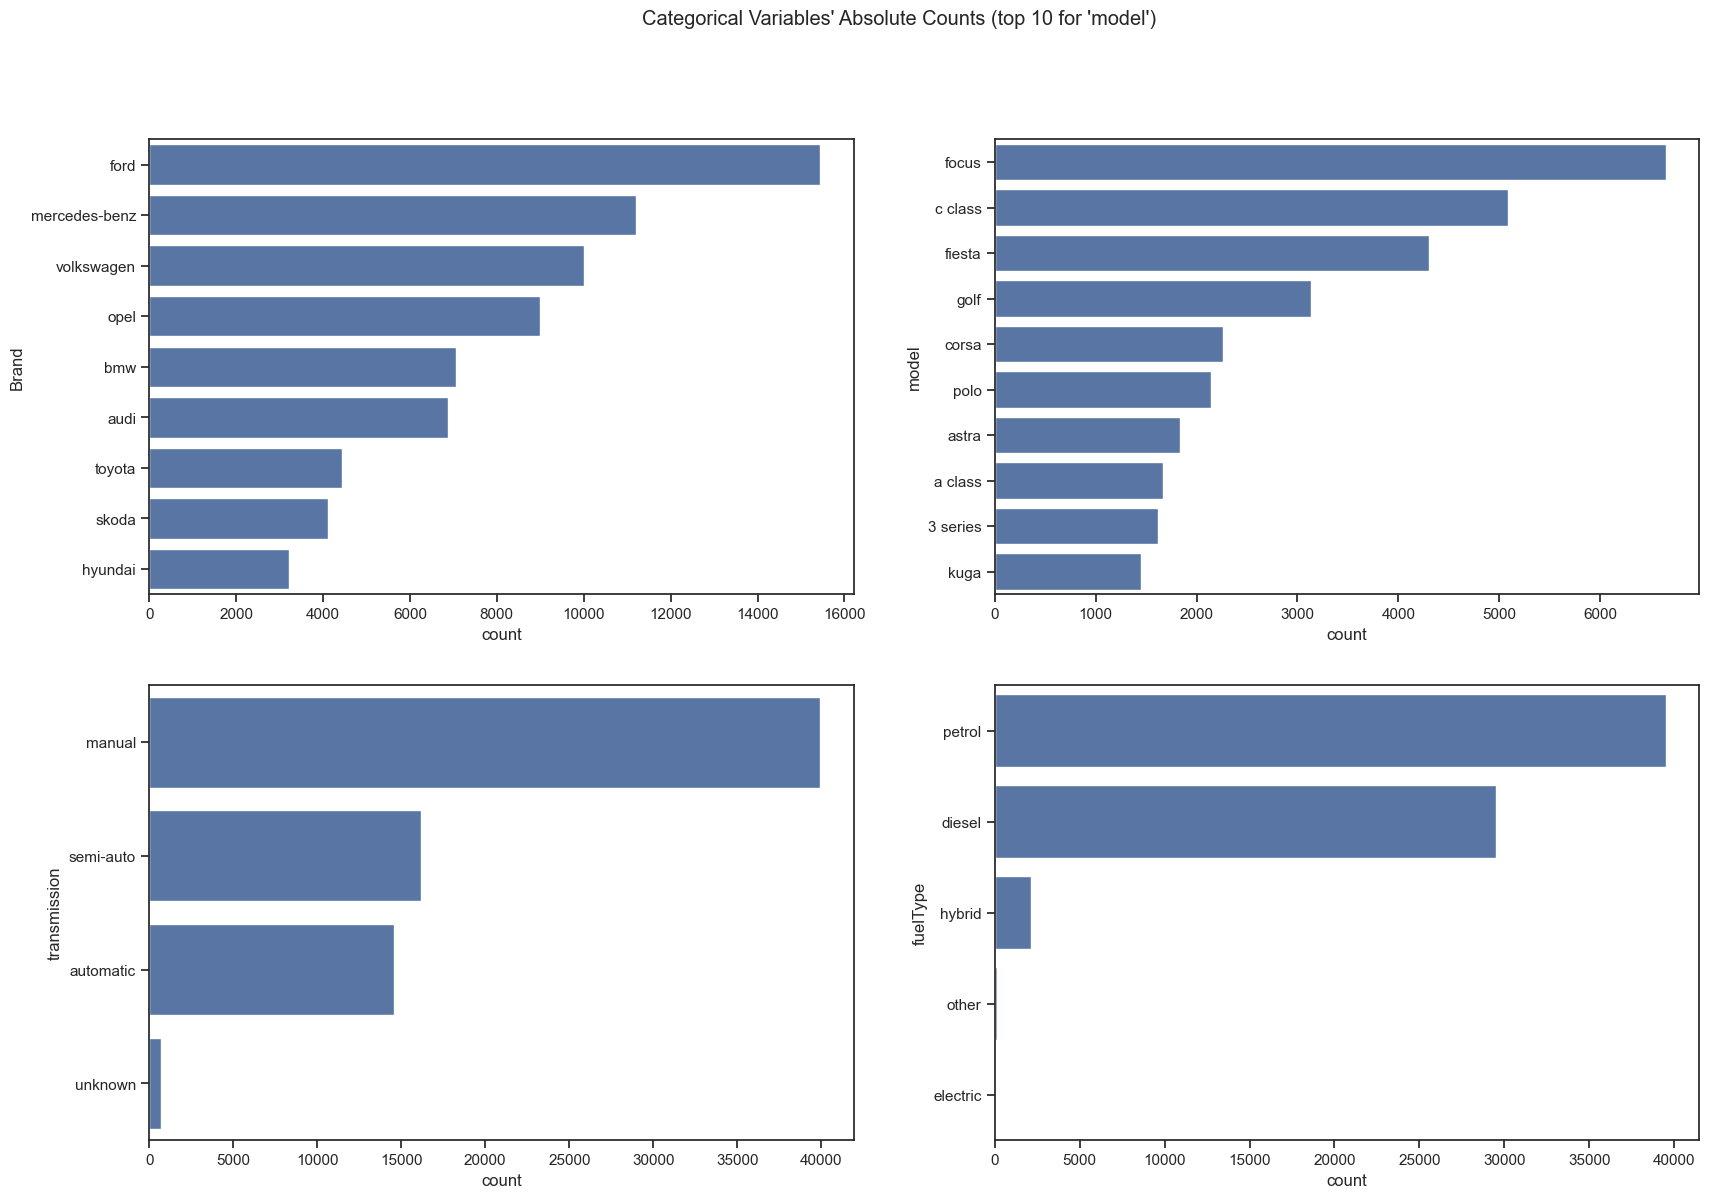

In [55]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

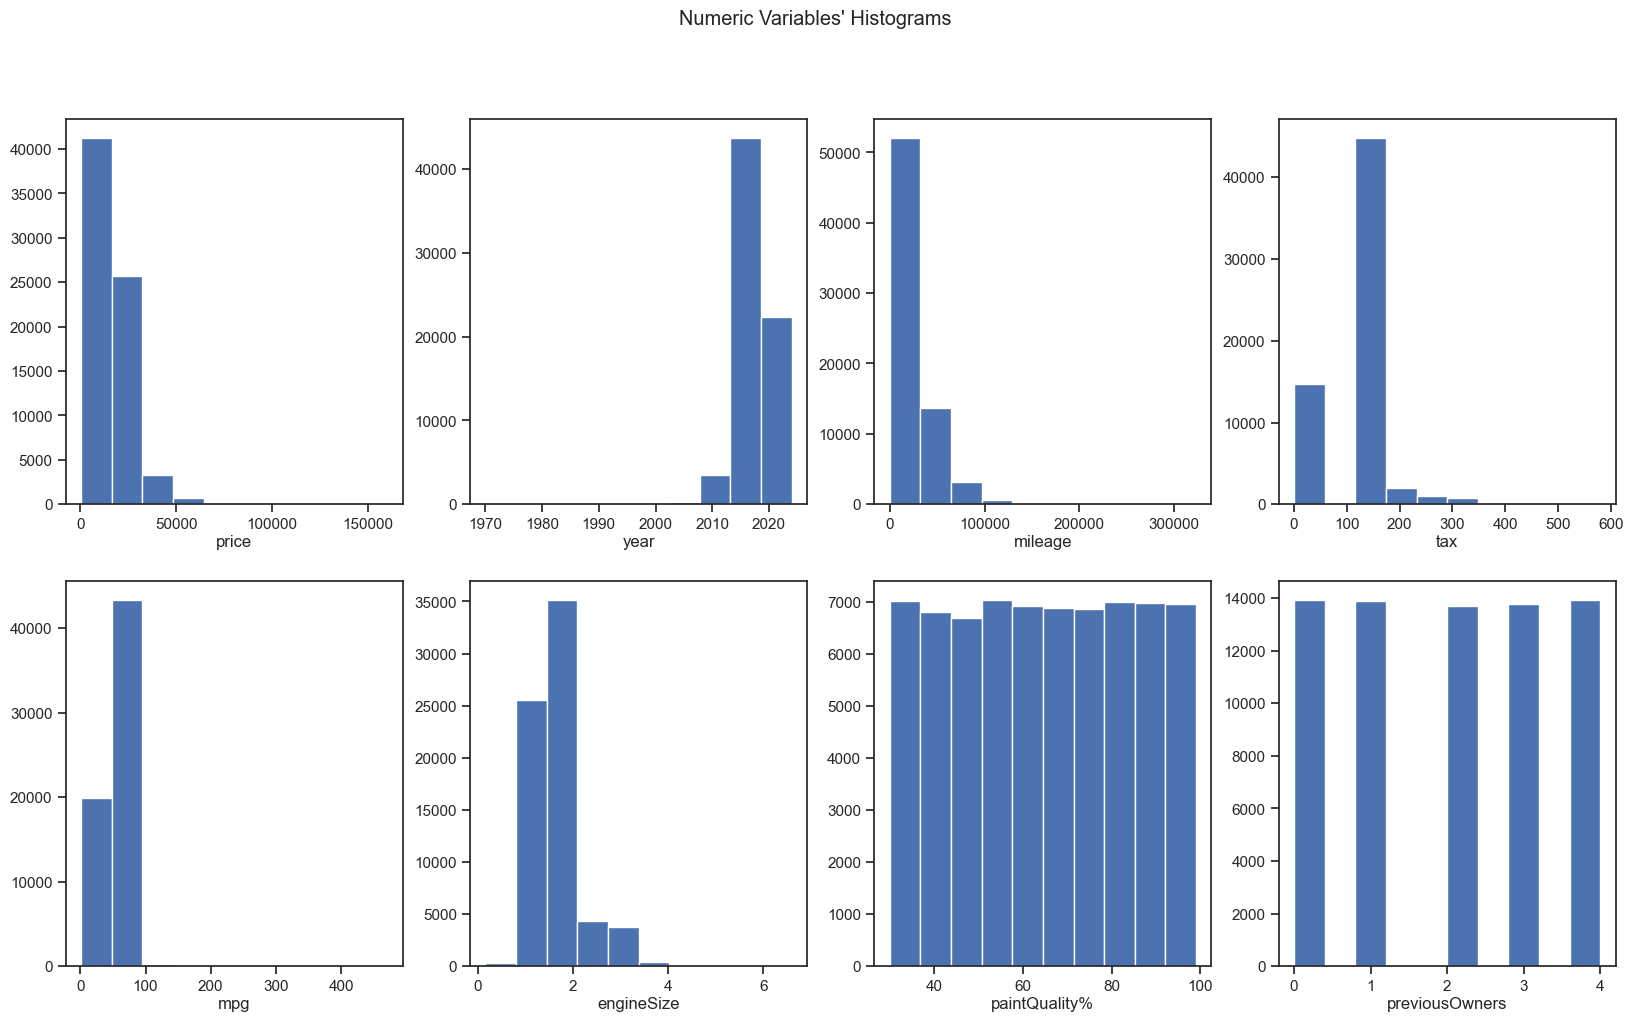

In [56]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

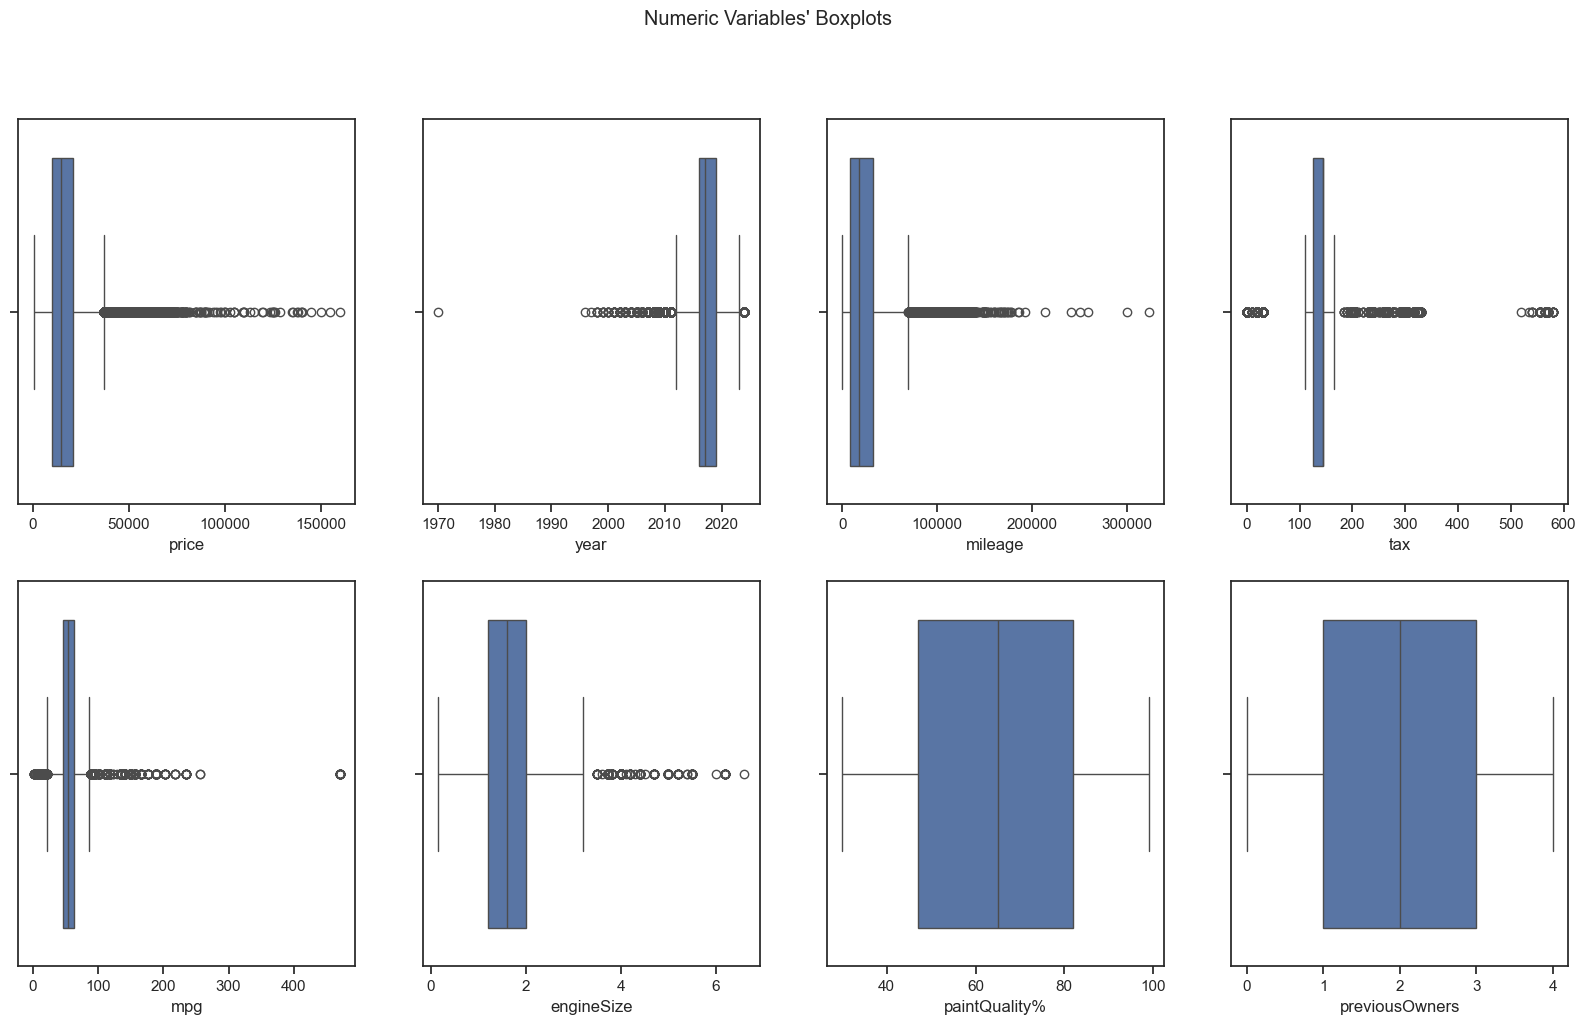

In [57]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

In [58]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1995]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
35769,mercedes-benz,m class,1970.0,24999,automatic,14000.0,diesel,305.0,39.2,NaN,44.0,3.0,0.0


In [59]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
8497,bmw,i3,2017.0,21495,automatic,24041.0,hybrid,0.0,470.8,NaN,46.0,3.0,0.0
9196,bmw,i3,2016.0,19850,automatic,19995.0,hybrid,0.0,470.8,NaN,79.0,3.0,0.0
9643,bmw,i3,2017.0,19948,automatic,20929.0,hybrid,135.0,470.8,NaN,71.0,2.0,0.0
9737,bmw,i3,2014.0,14495,automatic,34539.0,hybrid,0.0,470.8,NaN,42.0,0.0,0.0
10133,bmw,i3,2017.0,19300,automatic,NaN,other,0.0,470.8,0.600000,95.0,4.0,0.0
10327,bmw,i3,2014.0,15450,automatic,42479.0,hybrid,0.0,470.8,NaN,79.0,2.0,0.0
10695,bmw,i3,2017.0,21494,automatic,NaN,hybrid,135.0,470.8,NaN,54.0,1.0,0.0
10967,bmw,i3,2016.0,17000,automatic,41063.0,other,0.0,470.8,0.600000,34.0,NaN,0.0
11532,bmw,i3,2016.0,16500,automatic,35446.0,hybrid,0.0,470.8,NaN,59.0,3.0,0.0


In [60]:
#not weird
train.loc[train['mileage'] > 200000]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
4692,audi,a6,2008.0,2490,manual,323000.0,diesel,200.0,44.1,2.0,74.0,1.0,0.0
9978,bmw,x5,2012.0,7250,automatic,214000.0,diesel,300.0,37.7,3.0,68.0,1.0,0.0
45370,mercedes-benz,v class,2010.0,6949,automatic,259000.0,diesel,540.0,30.7,3.0,54.0,1.0,0.0
48042,skoda,octavia,2010.0,1485,manual,250650.0,diesel,125.0,57.6,1.9,62.0,1.0,0.0
48382,skoda,octavia,2010.0,1190,manual,300000.0,diesel,125.0,57.6,1.9,79.0,2.0,0.0
48912,skoda,octavia,NaN,2750,automatic,241565.0,diesel,185.0,47.9,1.9,33.0,4.0,0.0


In [61]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
41417,mercedes-benz,g class,2015.0,52995,semi-auto,34400.0,diesel,570.0,25.2,3.0,90.0,2.0,0.0
64835,opel,insignia,2011.0,8449,manual,63978.0,petrol,555.0,26.6,2.8,76.0,0.0,0.0
68949,volkswagen,sharan,2006.0,4990,manual,38511.0,petrol,555.0,29.1,2.0,39.0,1.0,0.0
30357,ford,mustang,2016.0,26475,manual,12000.0,petrol,570.0,20.9,5.0,98.0,3.0,0.0
46012,mercedes-benz,sl class,2011.0,149948,automatic,3000.0,petrol,570.0,21.4,6.2,78.0,4.0,0.0
8641,bmw,x5,2016.0,41211,semi-auto,46180.0,petrol,570.0,NaN,4.4,91.0,1.0,0.0
46065,mercedes-benz,e class,2015.0,25499,automatic,42422.0,petrol,555.0,28.8,5.5,43.0,3.0,0.0
35970,mercedes-benz,g class,2015.0,99850,semi-auto,10000.0,petrol,570.0,20.5,5.5,74.0,3.0,0.0
45503,mercedes-benz,gl class,2007.0,7340,automatic,104000.0,diesel,570.0,28.8,3.0,92.0,2.0,0.0


In [62]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
71722,volkswagen,polo,NaN,4695,manual,50000.0,diesel,30.0,62.8,1.4,91.0,3.0,0.0
12482,bmw,1 series,2016.0,12299,manual,27545.0,diesel,30.0,65.7,2.0,36.0,2.0,0.0
5791,audi,a1,2017.0,10465,manual,44330.0,diesel,0.0,76.3,1.6,87.0,2.0,0.0
10866,bmw,1 series,2012.0,6795,manual,75900.0,diesel,30.0,62.8,2.0,73.0,2.0,0.0
64515,opel,corsa,2017.0,7240,manual,15840.0,petrol,30.0,55.4,1.4,81.0,1.0,0.0
32108,hyundai,tucson,2016.0,12990,manual,NaN,diesel,30.0,61.7,1.7,61.0,4.0,0.0
30692,ford,focus,2015.0,8495,manual,33012.0,petrol,20.0,60.1,1.0,94.0,4.0,0.0
25585,ford,focus,2016.0,8125,manual,46480.0,petrol,20.0,61.4,1.0,30.0,1.0,0.0
21915,ford,ka,2013.0,4800,manual,40000.0,petrol,30.0,57.7,1.2,49.0,0.0,0.0


In [63]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
46536,mercedes-benz,c class,2013.0,23990,automatic,44000.0,petrol,NaN,NaN,6.2,88.0,2.0,0.0
5324,audi,r8,2019.0,119450,automatic,3000.0,petrol,145.0,21.4,5.2,47.0,2.0,0.0
12393,bmw,5 series,2016.0,30990,automatic,32000.0,petrol,555.0,28.5,4.4,30.0,1.0,0.0
41531,mercedes-benz,sl class,2016.0,49948,automatic,6200.0,petrol,555.0,28.0,5.5,79.0,4.0,NaN
42778,mercedes-benz,gle class,2018.0,66974,automatic,16592.0,petrol,145.0,23.7,5.5,44.0,4.0,0.0
40976,mercedes-benz,gle class,2019.0,75995,semi-auto,9.0,petrol,145.0,23.7,5.5,NaN,1.0,0.0
15818,ford,mustang,2018.0,31991,semi-auto,28915.0,petrol,145.0,22.1,5.0,35.0,2.0,0.0
1950,audi,r8,2019.0,135000,automatic,1000.0,petrol,145.0,32.8,5.2,30.0,1.0,0.0
36394,mercedes-benz,sl class,2019.0,89880,automatic,50.0,petrol,145.0,28.0,5.5,66.0,0.0,0.0


### 2.2.2 Bivariate Analysis

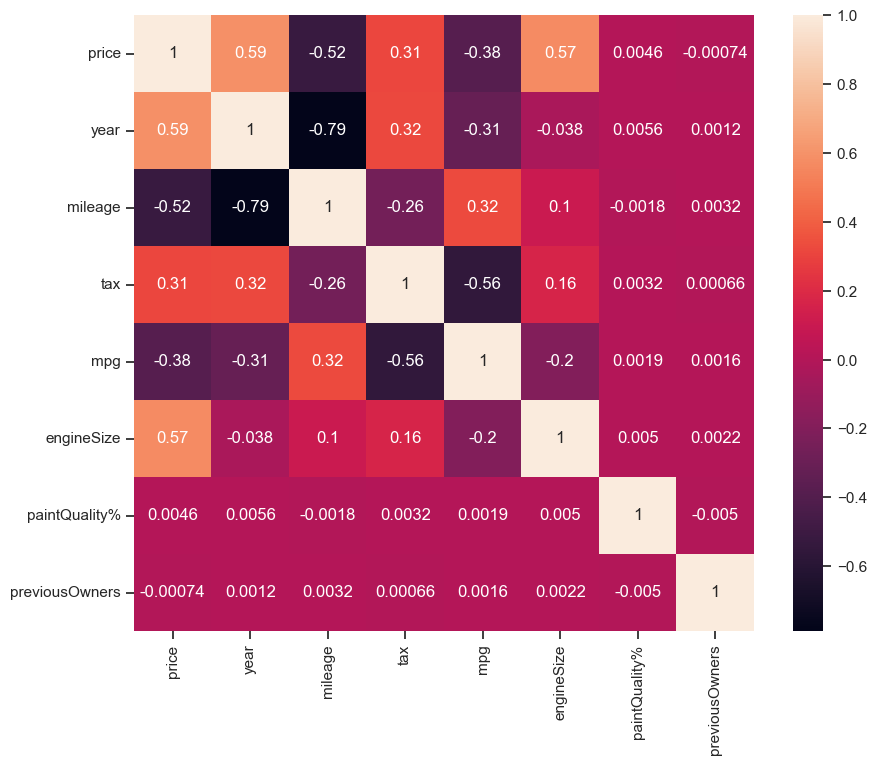

In [71]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True)

plt.show()

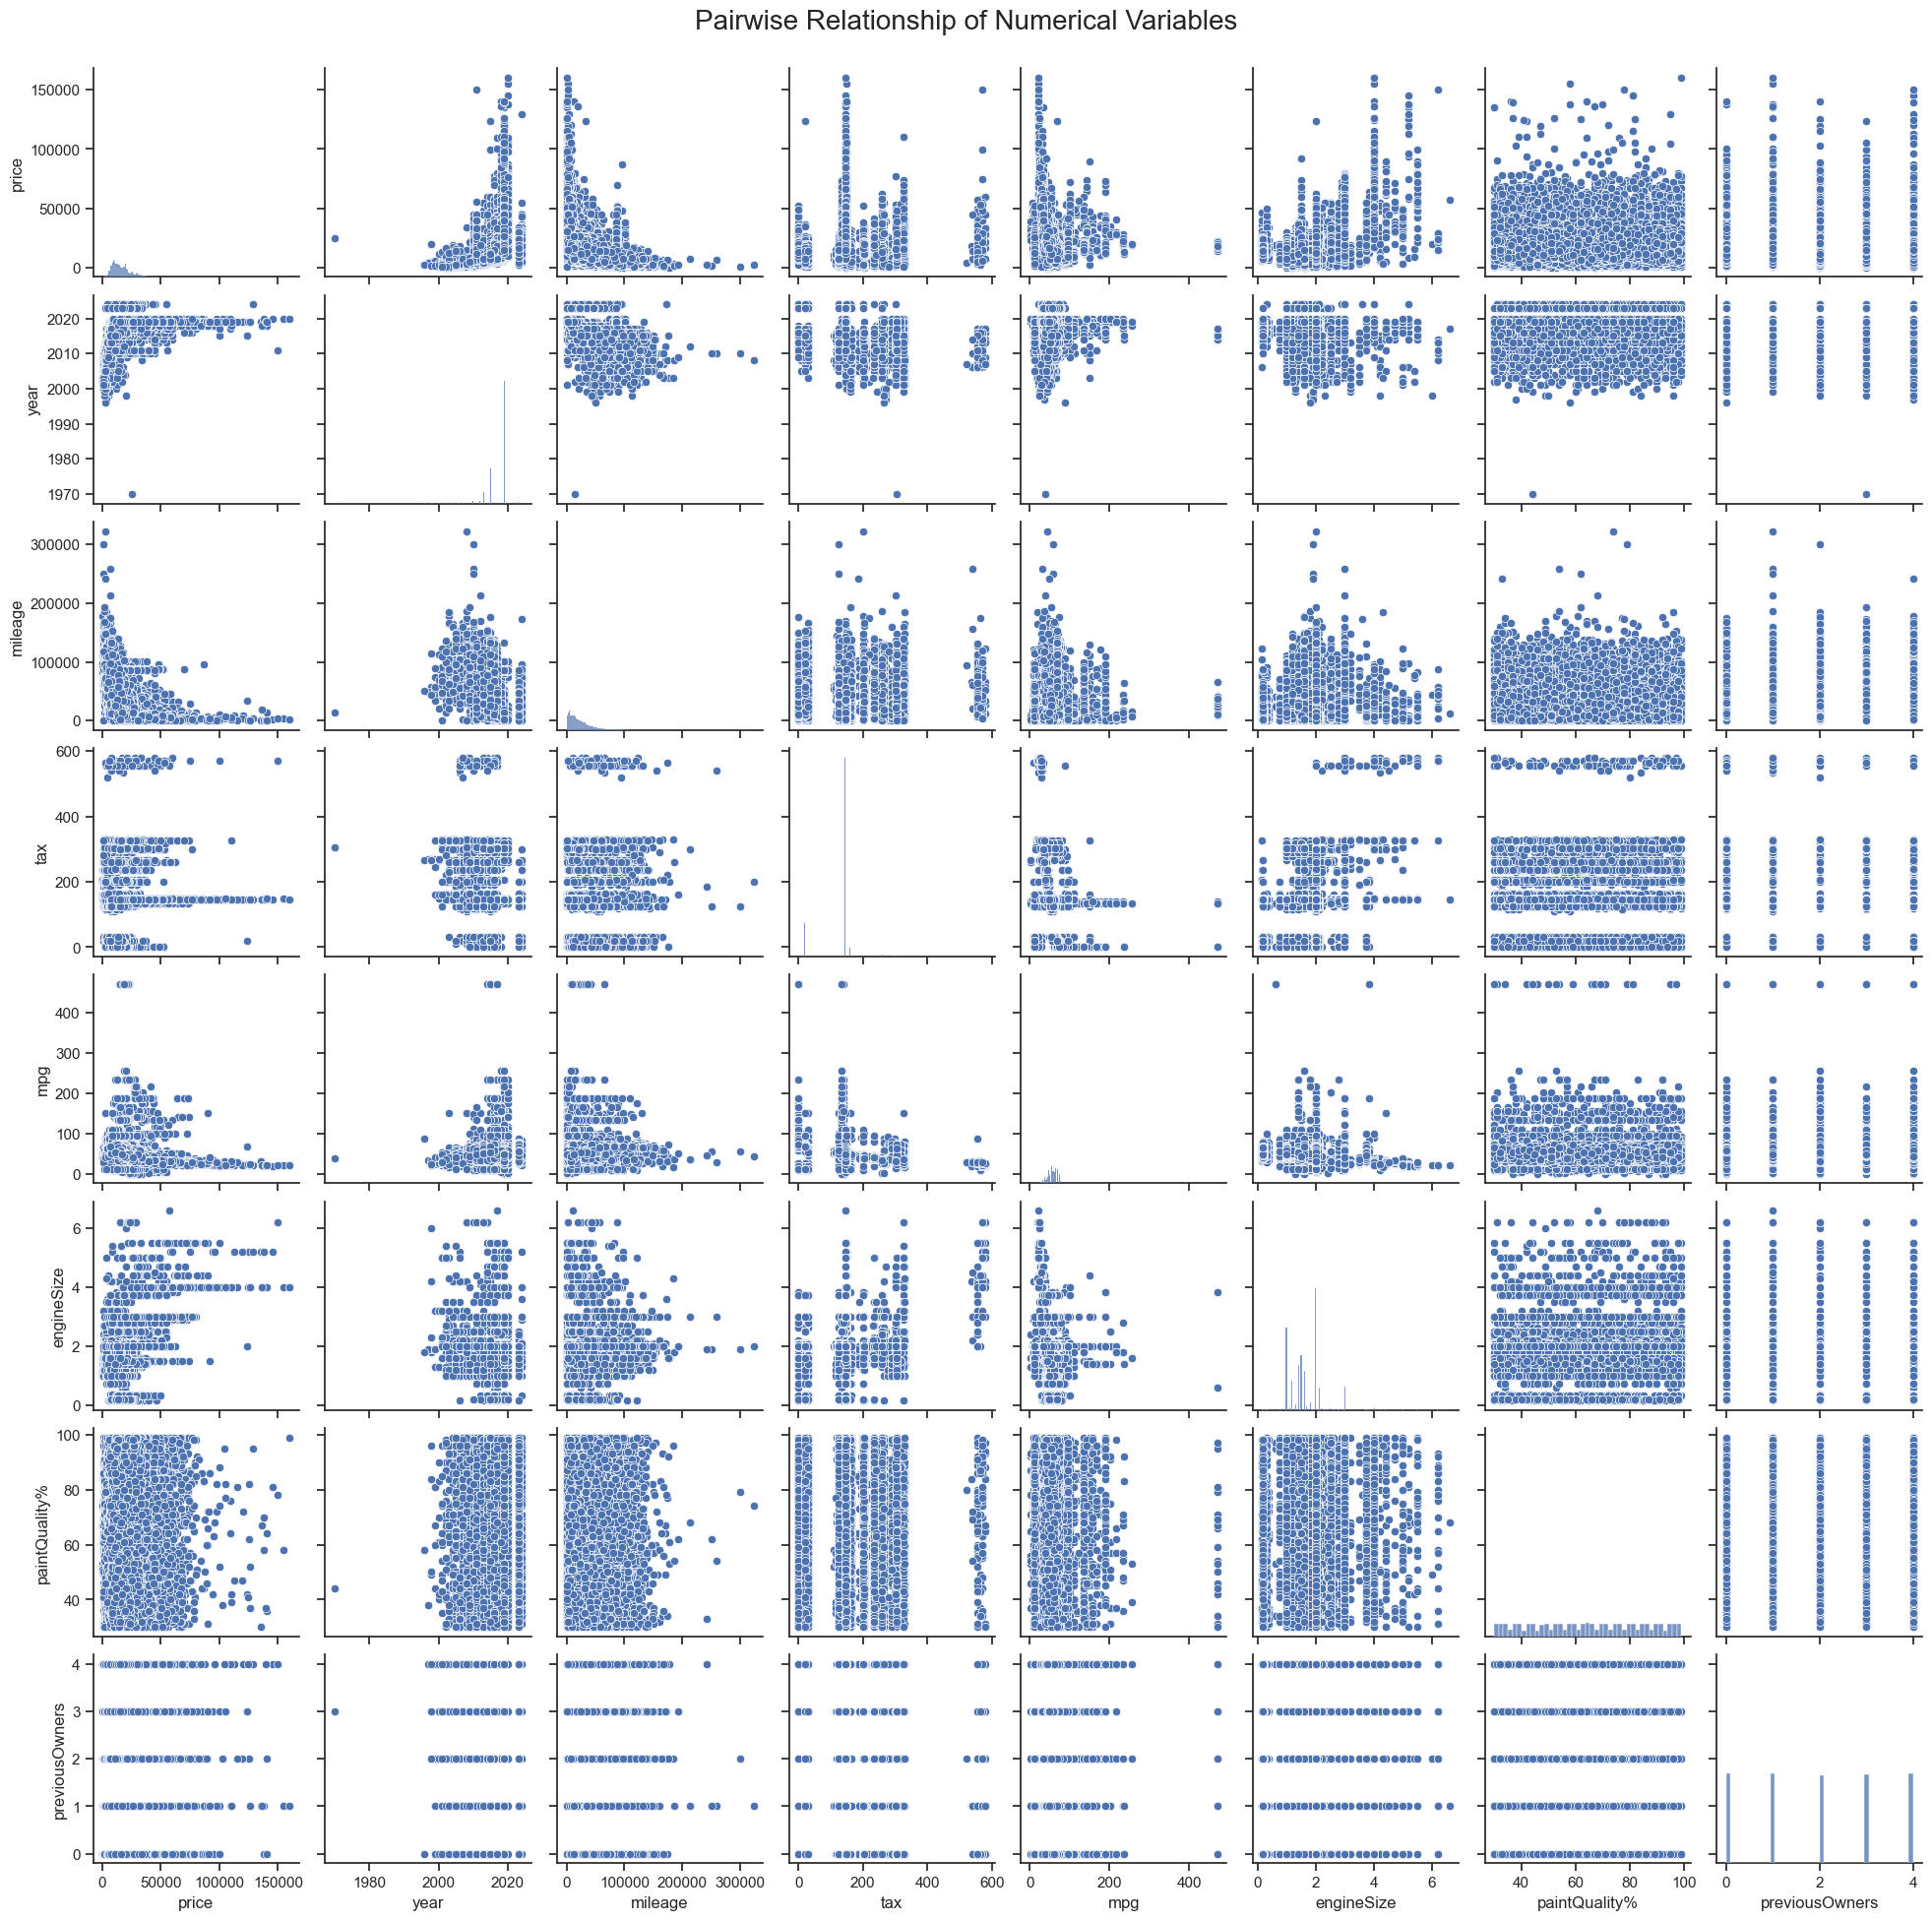

In [64]:
# Pairwise Relationship of Numerical Variables
sns.set_style('ticks')

# Setting pairplot
sns.pairplot(train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)


plt.show()

# 3. Data cleaning and Preprocessing

## 3.1 Duplicates

## 3.2 Feature Engeneering

### 3.2.1 Data Type Conversions

# Make sure the variable types are correctly identified

# Identifier
id_vars = ["carID"]
# Categorical variables (nominal, not ordered)
cat_vars = [
    "Brand",
    "model",
    "transmission",
    "fuelType"
]
# Ordinal variables (ordered but discrete)
ord_vars = [
    "year",
    "previousOwners"
]
# Continuous numerical variables
cont_vars = [
    "mileage",
    "tax",
    "mpg",
    "engineSize",
    "paintQuality%"
]
# Boolean variables
bool_vars = [
    "hasDamage"
]
# Variable groups in a dictionary
var_types = {
    "identifier": id_vars,
    "categorical": cat_vars,
    "ordinal": ord_vars,
    "continuous": cont_vars,
    "boolean": bool_vars
}
# Display 
for k, v in var_types.items():
    print(f"{k.capitalize():<12}: {v}")

In [65]:
# convert the variable types
for col in var_types['categorical']:
    train[col] = train[col].astype('category')

for col in var_types['ordinal']:
    train[col] = train[col].astype('category')

for col in var_types['continuous']:
    train[col] = train[col].astype('float')

for col in var_types['boolean']:
    train[col] = train[col].astype('bool')

NameError: name 'var_types' is not defined

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71329 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           71329 non-null  category
 1   model           71329 non-null  category
 2   year            69929 non-null  category
 3   price           71329 non-null  int64   
 4   transmission    71329 non-null  category
 5   mileage         69959 non-null  float64 
 6   fuelType        71329 non-null  category
 7   tax             63867 non-null  float64 
 8   mpg             63848 non-null  float64 
 9   engineSize      69898 non-null  float64 
 10  paintQuality%   69889 non-null  float64 
 11  previousOwners  69862 non-null  category
 12  hasDamage       71329 non-null  bool    
dtypes: bool(1), category(6), float64(5), int64(1)
memory usage: 4.4 MB


### 3.2.2 Encoding